Используемые библиотеки

In [1]:
pip install segyio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math
import segyio

Create depth-velocity model

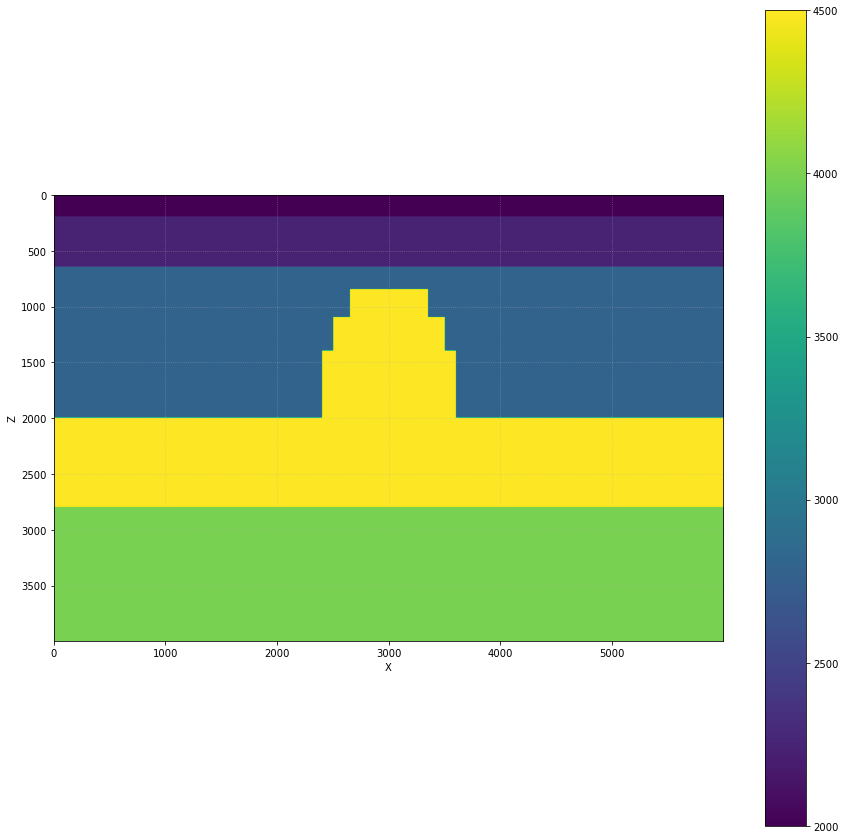

In [78]:
DVM = np.ones((6000, 4000))


# Define velocities

DVM[:,0:200] = 2000

DVM[:,200:650] = 2250

DVM[:,650:850] = 2800
DVM[:2650,850:1400] = 2800
DVM[3350:6000,850:1400] = 2800

DVM[:2400,1400:2000] = 2800
DVM[3600:6000,1400:2000] = 2800

DVM[:,2000:2800] = 4500
DVM[2650:3350,850:1400] = 4500
DVM[2400:3600,1400:2000] = 4500

DVM[:,2800:4000] = 4000

DVM[2500:3500,1100:1400] = 4500

# Apex - 700 m

plt.figure(figsize=(15, 15))
plt.imshow(DVM.transpose())
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(ls=':',alpha=.5) 
plt.colorbar(shrink=0.5)

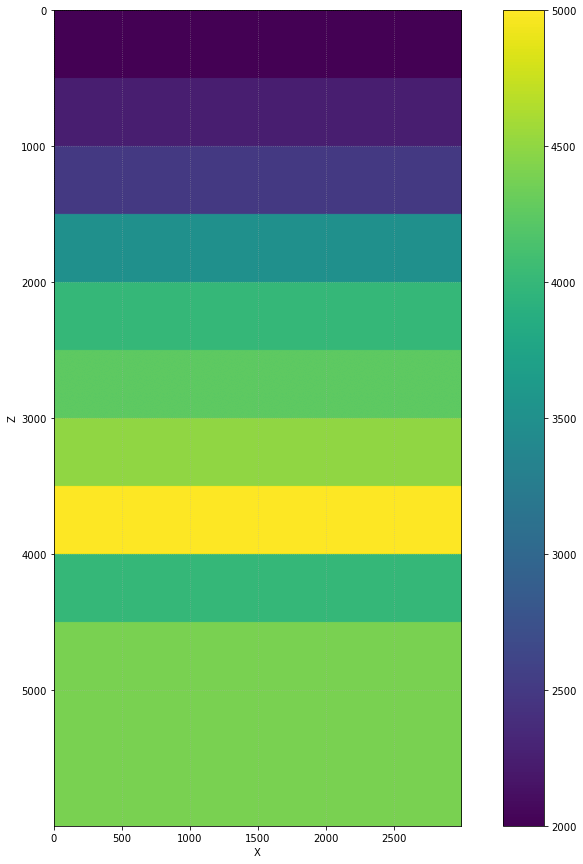

In [25]:
    # Create depth-velocity model
    DVM = np.ones((3000, 6000))

    # Define velocities
    
    DVM[:,0:500] = 2000
    DVM[:,500:1000] = 2250
    DVM[:,1000:1500] = 2500
    DVM[:,1500:2000] = 3500
    DVM[:,2000:2500] = 4000
    DVM[:,2500:3000] = 4250
    DVM[:,3000:3500] = 4500
    DVM[:,3500:4000] = 5000
    DVM[:,4000:4500] = 4000
    DVM[:,4500:6000] = 4400
    

    plt.figure(figsize=(15, 15)) 
    plt.imshow(DVM.transpose()) 
    plt.xlabel('X') 
    plt.ylabel('Z') 
    plt.grid(ls=':',alpha=.5) 
    plt.colorbar(shrink=1) 

In [10]:
# Calculation of travel time (without considering refraction)

def KinematicCalc(DVM, x_start, z_start, x_finish, z_finish):
    int_x_start, int_z_start = int(x_start), int(z_start)
    int_x_finish, int_z_finish = int(x_finish), int(z_finish)
    
    least_distance = math.sqrt((int_x_start - int_x_finish)**2 + (int_z_start - int_z_finish)**2) - 3
    time = 0
    x1 = int_x_start 
    z1 = int_z_start
    ray_in_homo = 2
    ray_whole = 2
    current_velocity = DVM[int_x_start, int_z_start]
    while least_distance >= 0:
        
        if int_x_finish - int_x_start == 0:
            direction_angle = 1.57079632679
        else:
            direction_angle = math.atan((int_z_finish - int_z_start)/(int_x_finish - int_x_start))
        least_distance -= 2
        
        
        if int_z_finish - int_z_start < 0 and int_x_finish - int_x_start < 0:
            #print('First')
            x2, z2 = int(x1 - math.cos(direction_angle) * ray_whole),  int(z1 - math.sin(direction_angle) * ray_whole)
        elif int_z_finish - int_z_start > 0 and int_x_finish - int_x_start < 0: 
            #print('Second')
            x2, z2 = int(x1 - math.cos(direction_angle) * ray_whole), int(z1 - math.sin(direction_angle) * ray_whole)
        elif int_z_finish - int_z_start < 0 and int_x_finish - int_x_start > 0: 
            #print('Third')
            x2, z2 = int(x1 + math.cos(direction_angle) * ray_whole), int(z1 + math.sin(direction_angle) * ray_whole)
        elif int_z_finish - int_z_start > 0 and int_x_finish - int_x_start == 0:
            #print('Zero')
            x2, z2 = int(x1), int(z1 + math.sin(direction_angle) * ray_whole)    
        elif int_z_finish - int_z_start < 0 and int_x_finish - int_x_start == 0: 
            #print('Zero')
            x2, z2 = int(x1), int(z1 - math.sin(direction_angle) * ray_whole)    
        else: 
            #print('Fourth')
            x2, z2 = int(x1 + math.cos(direction_angle) * ray_whole), int(z1 + math.sin(direction_angle) * ray_whole)
        
        
        #print(x2, z2)
        # try:
        if DVM[x2, z2] != current_velocity:
            time = time + ray_in_homo / current_velocity
            ray_in_homo = 2
            ray_whole += 2
        else:
            ray_in_homo += 2
            ray_whole += 2
        #except IndexError:
           # least_distance = -1
    time = time + (ray_in_homo - 2) / current_velocity
    return time


In [5]:
# Define receivers and sources positions
coord_rec_x = []
coord_sou_x = []
s_x = 0
r_x = 0
for i in range(121):
    coord_rec_x.append(r_x)
    r_x = r_x + 50
    
for j in range(21):
    coord_sou_x.append(s_x)
    s_x = s_x + 300
    

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000] [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800, 5100, 5400, 5700, 6000]


In [7]:
# Создание пространства сейсмического изображения 

seismic_image = np.zeros((6000, 4000))

Text(0, 0.5, 'Time')

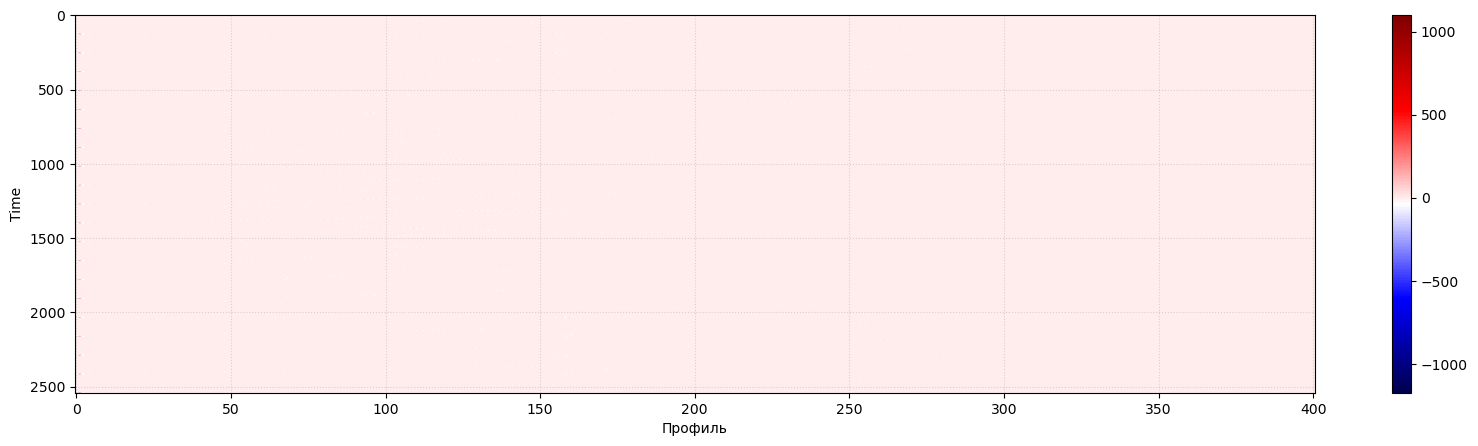

In [8]:
# Загрузка и просмотр сейсмограмм ОПВ

with segyio.open('Model_SALT_DOME_SECOND+GathAP-Z.sgy', mode='r+', strict=True,  iline=0, xline=0, ignore_geometry=True, endian='big') as f:
    xsection = f.trace.raw[:]

plt.figure(figsize=[20, 5], dpi=100)
plt.imshow(xsection, cmap='seismic', aspect='auto')
plt.colorbar()
plt.grid(ls=':',alpha=.5)
plt.xlabel('Профиль') 
plt.ylabel('Time') 



{TRACE_SEQUENCE_LINE: 2, TRACE_SEQUENCE_FILE: 2, FieldRecord: 2, TraceNumber: 2, EnergySourcePoint: 2, CDP: 2, CDP_TRACE: 2, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 1, offset: 1050, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: -100, SourceGroupScalar: -100, SourceX: 310000, SourceY: 0, GroupX: 205000, GroupY: 0, CoordinateUnits: 1, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 601, TRACE_SAMPLE_INTERVAL: 5000, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTaperLengthStart: 0, SweepT

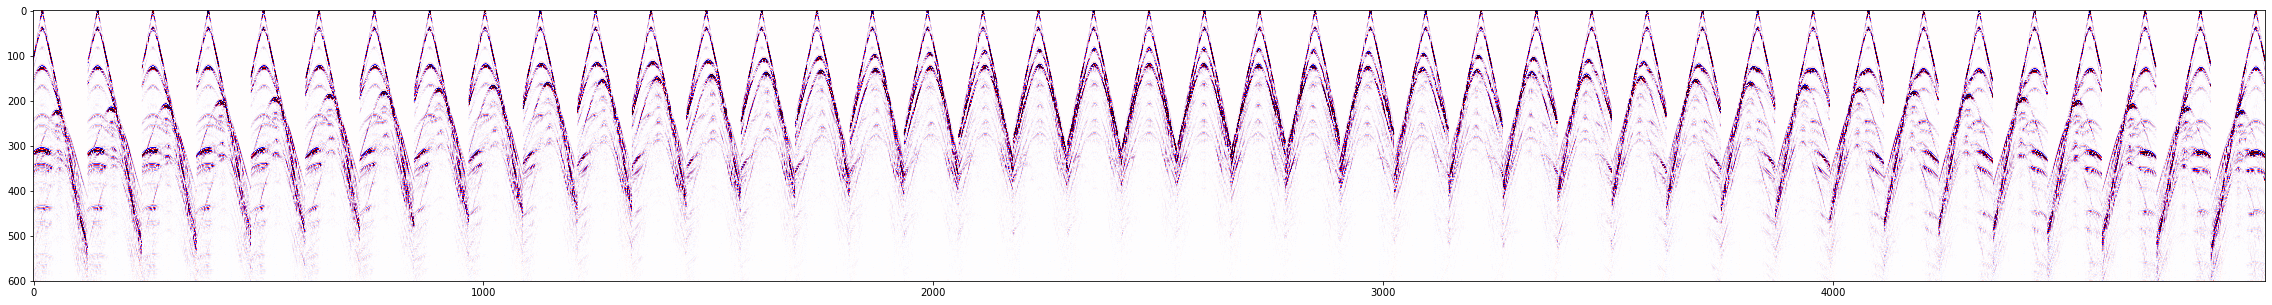

In [60]:
segyfile = 'M090623.sgy'

f = segyio.open(segyfile, ignore_geometry=True)

clip = 5
vmin, vmax = -clip, clip

# Figure
figsize=(40, 40)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k',
                       squeeze=False,
                       sharex=True)
axs = axs.ravel()
im = axs[0].imshow(f.trace.raw[:].T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

print(f.header[122])

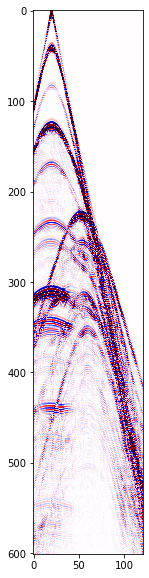

In [67]:
xsection = segyio.tools.collect(f.trace[:121])
clip = 5
vmin, vmax = -clip, clip

# Figure
figsize=(10, 10)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k',
                       squeeze=False,
                       sharex=True)
axs = axs.ravel()
im = axs[0].imshow(xsection.T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

In [68]:
# Разбиваем на сейсмограммы

# 21 сейсмограмма, шаг по ПП - 25 м, шаг по ПВ - 150 м, профиль - 3000 м, 21 источник, 121 приемник

seismograms = []
beg = 0
end = 121

for i in range(41):
    ssg = segyio.tools.collect(f.trace[beg:end])
    seismograms.append(ssg)
    beg += 121
    end += 121


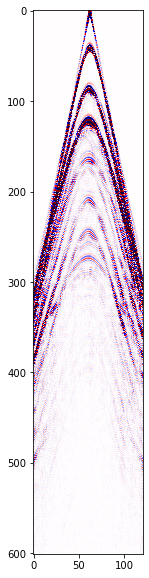

In [71]:
clip = 5
vmin, vmax = -clip, clip

# Figure
figsize=(100, 10)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k',
                       squeeze=False,
                       sharex=True)
axs = axs.ravel()
im = axs[0].imshow(seismograms[21].T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

In [74]:
# Create seismic image

seismic_image = np.zeros((3000, 6000))

In [72]:
# Вручную положение источников и приемников
coord_rec_x = []
coord_sou_x = []
s_x = 1000
r_x = 0
for i in range(121):
    coord_rec_x.append(r_x)
    r_x = r_x + 50
    
for j in range(41):
    coord_sou_x.append(s_x)
    s_x = s_x + 100
    
print(coord_rec_x)
print(coord_sou_x)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000]
[1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000]


In [75]:
coord_rec_x = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000, 1025, 1050, 1075, 1100, 1125, 1150, 1175, 1200, 1225, 1250, 1275, 1300, 1325, 1350, 1375, 1400, 1425, 1450, 1475, 1500, 1525, 1550, 1575, 1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850, 1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125, 2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400, 2425, 2450, 2475, 2500, 2525, 2550, 2575, 2600, 2625, 2650, 2675, 2700, 2725, 2750, 2775, 2800, 2825, 2850, 2875, 2900, 2925, 2950, 2975, 2999]
coord_sou_x = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 2999]

In [82]:
# One trace processing

def RSR_one_trace(coord_of_source, coord_of_trace, number_of_trace, trace, DVM, seismic_image):
        # Замер времени
        #st = time.time()
        print('Трасса:', number_of_trace, 'Источник положение:', coord_of_source, 'Приемник:', coord_of_trace)
        if coord_of_trace == coord_of_source:
            pass
        else:
            # Удаление
            offset = abs(coord_of_trace - coord_of_source)
            # Начальная длина пробега, параметр эллипса
            distance_ray = offset + 25
            # Срединная точка
            midpoint = (coord_of_source + coord_of_trace) / 2
            process = True
            # Количество лучей будет расти с ростом величины диаметра окружности
            calc_rn = 20
            real_rn = 20
            while process:
                # Координаты выходящих центровых лучей
                # расстояние от центровой точки, где начинается перебор (формула точно правильная)
                border = math.sqrt(0.25 * distance_ray**2 * (1 - math.sqrt(distance_ray**2 - offset**2) / distance_ray)**2)
                # Координата, где начинается перебор
                coord_l = 0 - border + 0.000001
                # Шаг по лучам
                step_l = 2 * border / real_rn
                for r in range(real_rn):
                    # Уравнения верны, уравнения координат пересечения эллипса
                    x_ellips = coord_l / (1 - (1/distance_ray)*math.sqrt(distance_ray**2 - offset**2))
                        
                    m1 = 0.25 - (x_ellips**2 / distance_ray**2)
                    z_ellips = math.sqrt((distance_ray**2 - offset**2)*(0.25 - (x_ellips**2 / distance_ray**2)))
                    
                    #print('X:', x_ellips, 'Z:', z_ellips)
                    # Проверка ограничений по пространству
                    #print(coord_of_source, 0, x_ellips + midpoint, z_ellips)
                    #print(x_ellips + midpoint, z_ellips, coord_of_trace, 0)
                    if x_ellips + midpoint > 6000 or x_ellips + midpoint < 0 or z_ellips > 4000 or z_ellips < 0:
                        coord_l += step_l - 0.000001
                    else:
                        # Время распространения в секундах
                        try:
                            travel_time = KinematicCalc(DVM, coord_of_source, 0, x_ellips + midpoint, z_ellips) + KinematicCalc(DVM, x_ellips + midpoint, z_ellips, coord_of_trace, 0)
                            # Найти соответствующий отсчёт на сейсмотрассе (1 отсчёт = 10 мс)
                            if travel_time < 3:
                                amplitude = trace[int(travel_time * 200)]
                                #tan_angle_of_square = -(x_ellips - coord_l)/(z_ellips)
                                seismic_image[int(x_ellips + midpoint), int(z_ellips)] += amplitude   
                            coord_l += step_l
                        except IndexError:
                            #print(coord_of_source, 0, x_ellips + midpoint, z_ellips)
                            #print(x_ellips + midpoint, z_ellips, coord_of_trace, 0)
                            coord_l += step_l
                # Увеличение эллипса
                distance_ray += 5
                calc_rn += 0.01
                real_rn = int(calc_rn)
                if distance_ray > 5000:
                    process = False
        #print("--- %s seconds ---" % (time.time() - st))    

In [83]:
# One seismogramm processing

def RSR_ONE(seismogram, DVM, number): 
    st = time.time()
    seismic_image = np.zeros((6000, 4000))
    i = number
    for rec in range(len(coord_rec_x)): 
        RSR_one_trace(coord_sou_x[i], coord_rec_x[rec], rec, seismograms[i][rec], DVM, seismic_image)   
    print("--- %s minutes ---" % ((time.time() - st) / 60))
    return seismic_image
                    


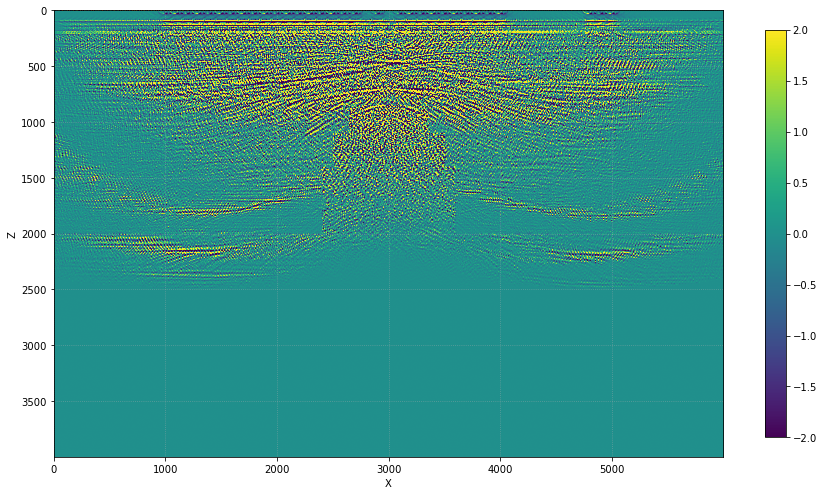

In [217]:
plt.figure(figsize=(15, 15)) # создание рисунка
plt.imshow(tt.transpose(), vmin=-2, vmax=2) # визуализация первого сечения по первой оси
plt.xlabel('X') # подпись оси
plt.ylabel('Z') # подпись оси
plt.grid(ls=':',alpha=.5) # добавление сетки
plt.colorbar(shrink=0.5) # добавление цветовой шкалы

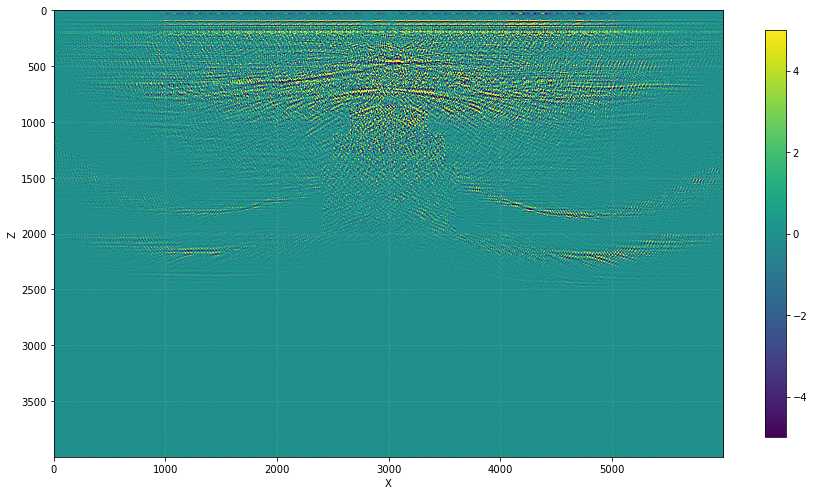

In [242]:
plt.figure(figsize=(15, 15)) # создание рисунка
plt.imshow(tt.transpose(), vmin=-5, vmax=5) # визуализация первого сечения по первой оси
plt.xlabel('X') # подпись оси
plt.ylabel('Z') # подпись оси
plt.grid(ls=':',alpha=.5) # добавление сетки
plt.colorbar(shrink=0.5) # добавление цветовой шкалы

401.0000000000227


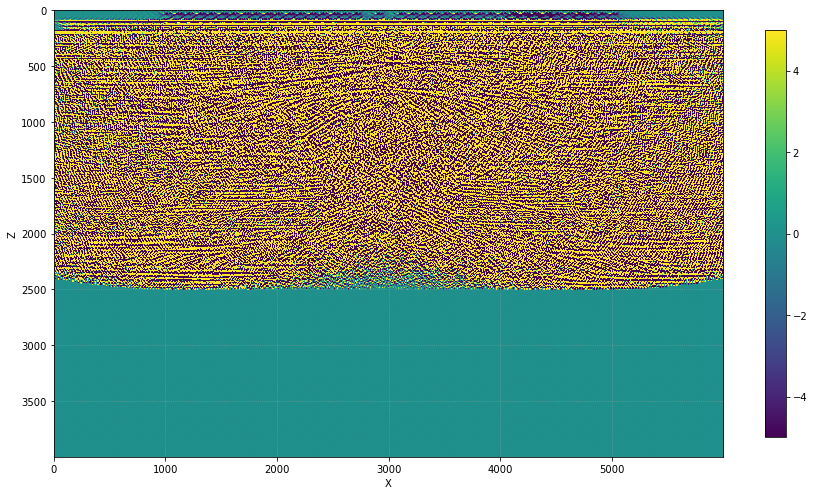

In [287]:
# Enhancement with time-related function

new_si = np.zeros((6000, 4000))


depth_step = 1

for i in range(6000):
    depth_step = 1
    for j in range(4000):
        new_si[i, j] = tt[i, j] * depth_step
        depth_step += 0.1

print(depth_step)

plt.figure(figsize=(15, 15)) # создание рисунка
plt.imshow(new_si.transpose(), vmin=-5, vmax=5) # визуализация первого сечения по первой оси
plt.xlabel('X') # подпись оси
plt.ylabel('Z') # подпись оси
plt.grid(ls=':',alpha=.5) # добавление сетки
plt.colorbar(shrink=0.5) # добавление цветовой шкалы        

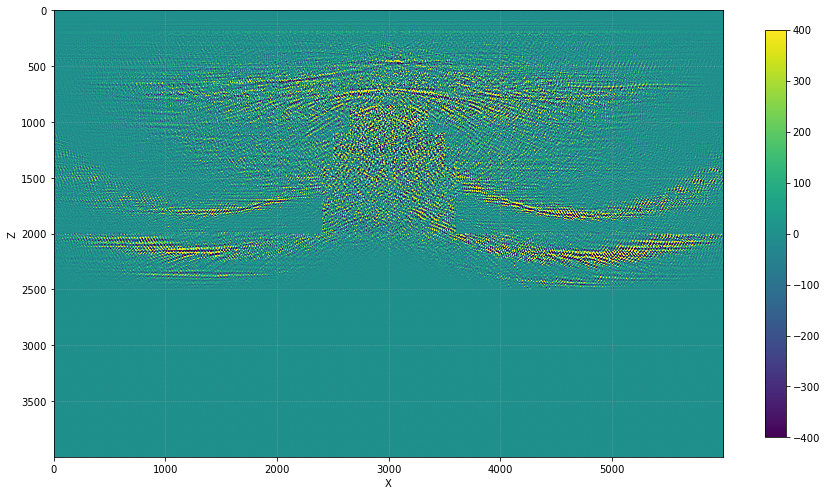

In [290]:
plt.figure(figsize=(15, 15)) # создание рисунка
plt.imshow(new_si.transpose(), vmin=-400, vmax=400) # визуализация первого сечения по первой оси
plt.xlabel('X') # подпись оси
plt.ylabel('Z') # подпись оси
plt.grid(ls=':',alpha=.5) # добавление сетки
plt.colorbar(shrink=0.5) # добавление цветовой шкалы        